# 1. Introduction 

### This study is going to predict which passengers would survive from the Titanic disaster by means of machine learning modelling techniques. It is going present a full machine learning work flow, use 10 Machine Learning algorithms, tune their parameters and ensemble the best n (e.g. 6) of them using their accuracy scores for the validation set. 

<font color = 'blue'>
 CONTENTS:  
    
   1. [Introduction](#1)
       * 1.1 [Summary Information about the variables and their types in the data](#1.1)
   2. [Exploratory Data Analysis](#2)
       * 2.1 [Importing Libraries](#2.1)
       * 2.2 [Loading Data](#2.2)
       * 2.3 [Basic summary statistics about the data](#2.3)       
   3. [Data Preparation](#3)
       * 3.1 [Dropping Ticket number and Embarked Variables](#3.1)  
       * 3.2 [Extraction of Title and Nicknamed variables from Name variable](#3.2)
           * 3.2.1 [Clustering Title variable](#3.2.1) 
       * 3.3 [Create Cabin_dummy variable](#3.3)
       * 3.4 [Outlier Treatment](#3.4)
       * 3.5 [Missing Value Treatment](#3.5)
           * 3.5.1 [For Age](#3.5.1)     
           * 3.5.2 [For Fare](#3.5.2)   
       * 3.6 [Categorical Variables' Encoding](#3.6)
           * 3.6.1 [Label encoding of sex variable to a dummy variable (0-1)](#3.6.1)
           * 3.6.2 [One hot encoding of Title and Pclass](#3.6.2)         
   4. [Visualizations](#4)
       * 4.1 [Correlation matrix as heatmap](#4.1)
       * 4.2 [SibSp versus Survived](#4.2)
       * 4.3 [Parch versus Survived](#4.3)
       * 4.4 [Age versus Survived](#4.4)
   5. [More Feature Engineering and Final Correlation Matrix](#5)
       * 5.1 [Correlation matrix](#5.1)
       * 5.2 [Generating small_family, dropping family size and sex](#5.2)
       * 5.3 [Final correlation matrix as heatmap](#5.3)
   6. [Modeling, Model Evaluation and Model Tuning](#6)
       * 6.1 [Splitting the train data](#6.1) 
       * 6.2 [Validation Set Test Accuracy for the default models](#6.2) 
       * 6.3 [Cross validation accuracy and std of the default models for all the train data](#6.3)    
       * 6.4 [Model tuning using crossvalidation](#6.4)   
       * 6.5 [Ensembling](#6.5) 
   7. [Submission](#7)
 

## 1.1 Summary Information about the variables and their types in the data <a id = '1.1'></a><br>


Survival: Survival -> 0 = No, 1 = Yes

Pclass: Passennger ticket class -> 1 = 1st (Upper), 2 = 2nd (Middle), 3 = 3rd (Lower)

Name: Name of the passenger including title and (if written in quotes) nickname

Sex: Male or Female

Age: Age in years

SibSp: # of Siblings (brother,sister,stepbrother,stepsister) and Spouses (husband or wife) aboard the ship

Parch: # of Parents and Children  aboard the ship

Ticket: Ticket code

Fare: Passenger fare paid

Cabin: Cabin code

Embarked: Port of Embark for the passenger -> C = Cherbourg, Q = Queenstown, S = Southampton

# 2. Exploratory Data Analysis <a id = '2'></a><br> 

### 2.1 Importing Libraries <a id = '2.1'></a><br>

In [1]:
# data analysis libraries:
import numpy as np
import pandas as pd
import re

# data visualization libraries:
import matplotlib.pyplot as plt
import seaborn as sns

# to ignore warnings:
import warnings
warnings.filterwarnings('ignore')

# to display all columns:
pd.set_option('display.max_columns', None)

#timer
import time
from contextlib import contextmanager

# Importing modelling libraries
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,KFold
from sklearn.preprocessing import StandardScaler  
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,VotingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.calibration import CalibratedClassifierCV

@contextmanager
def timer(title):
    t0 = time.time()
    yield
    print("{} done in {:.0f}s".format(title, time.time() - t0))

## 2.2 Loading Data <a id = '2.2'></a><br>

In [2]:
# Read train and test data with pd.read_csv():
train = pd.read_csv("/kaggle/input/titanic/train.csv")
test = pd.read_csv("/kaggle/input/titanic/test.csv")

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## 2.3 Basic summary statistics about the data <a id = '2.3'></a><br>

##### Descriptive statistics excluding PassengerId which does not carry any meaningful information for Survival.

In [7]:
train.iloc[:,1:len(train)].describe([0.01,0.1,0.25,0.5,0.75,0.99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,99%,max
Survived,891.0,0.383838,0.486592,0.00,0.0,0.00,0.0000,0.0000,1.0,1.00000,1.0000
Pclass,891.0,2.308642,0.836071,1.00,1.0,1.00,2.0000,3.0000,3.0,3.00000,3.0000
Age,714.0,29.699118,14.526497,0.42,1.0,14.00,20.1250,28.0000,38.0,65.87000,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0,0.00,0.0000,0.0000,1.0,5.00000,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0,0.00,0.0000,0.0000,0.0,4.00000,6.0000
Fare,891.0,32.204208,49.693429,0.00,0.0,7.55,7.9104,14.4542,31.0,249.00622,512.3292


In [8]:
test.iloc[:,1:len(test)].describe([0.01,0.1,0.25,0.5,0.75,0.99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,99%,max
Pclass,418.0,2.265550,0.841838,1.00,1.000000,1.00000,1.0000,3.0000,3.0,3.000,3.0000
Age,332.0,30.272590,14.181209,0.17,0.857900,16.10000,21.0000,27.0000,39.0,64.000,76.0000
SibSp,418.0,0.447368,0.896760,0.00,0.000000,0.00000,0.0000,0.0000,1.0,4.000,8.0000
Parch,418.0,0.392344,0.981429,0.00,0.000000,0.00000,0.0000,0.0000,0.0,4.000,9.0000
Fare,417.0,35.627188,55.907576,0.00,6.446828,7.64168,7.8958,14.4542,31.5,262.375,512.3292


In [9]:
print('There seem to be obvious outlier observations for Fare variable.')

There seem to be obvious outlier observations for Fare variable.


In [10]:
    for var in train:
        if var != 'Survived':
            if len(list(train[var].unique())) <= 10:
                    print(pd.DataFrame({'Mean_Survived': train.groupby(var)['Survived'].mean()}), end = "\n\n\n")

        Mean_Survived
Pclass               
1            0.629630
2            0.472826
3            0.242363


        Mean_Survived
Sex                  
female       0.742038
male         0.188908


       Mean_Survived
SibSp               
0           0.345395
1           0.535885
2           0.464286
3           0.250000
4           0.166667
5           0.000000
8           0.000000


       Mean_Survived
Parch               
0           0.343658
1           0.550847
2           0.500000
3           0.600000
4           0.000000
5           0.200000
6           0.000000


          Mean_Survived
Embarked               
C              0.553571
Q              0.389610
S              0.336957




In [11]:
print('Number of missing values and their percentage for Train and Test sampleS respectively', end = "\n\n")
for df in [train,test]:
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    print(pd.concat([total,percent], axis=1, keys=['Total','Percent']), end = "\n\n")

Number of missing values and their percentage for Train and Test sampleS respectively

             Total   Percent
Cabin          687  0.771044
Age            177  0.198653
Embarked         2  0.002245
Fare             0  0.000000
Ticket           0  0.000000
Parch            0  0.000000
SibSp            0  0.000000
Sex              0  0.000000
Name             0  0.000000
Pclass           0  0.000000
Survived         0  0.000000
PassengerId      0  0.000000

             Total   Percent
Cabin          327  0.782297
Age             86  0.205742
Fare             1  0.002392
Embarked         0  0.000000
Ticket           0  0.000000
Parch            0  0.000000
SibSp            0  0.000000
Sex              0  0.000000
Name             0  0.000000
Pclass           0  0.000000
PassengerId      0  0.000000



In [12]:
print('There are missing observations for Age, Fare,Embarked and Cabin variables.')

There are missing observations for Age, Fare,Embarked and Cabin variables.


# 3. Data Preparation <a id = '3'></a><br> 

## 3.1 Dropping Ticket number and Embarked Variables <a id = '3.1'></a><br>

We can drop Ticket feature since it is unlikely to have useful information. In addition, although the embark places shows diffent correlations of the passengers is unlikely to be related to the future survival of the passengers.

In [13]:
train.drop(['Ticket','Embarked'], axis = 1,inplace=True)   
test.drop(['Ticket','Embarked'], axis = 1,inplace=True)

## 3.2 Extraction of Title and Nicknamed variables from Name variable <a id = '3.2'></a><br>

In the names, there are title and nickname information which may be useful in our analysis. Title gives more information about socioeconomics status, and the people with nicknames may be more lively.

In [14]:
for d in [train,test]:
    d['Nicknamed']=d['Name'].apply(lambda x: 1 if '''"''' in x else 0)
    d["Title"] = d["Name"].str.extract(' ([A-Za-z]+)\.', expand=False)

In [15]:
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Capt,0.000000
1,Col,0.500000
2,Countess,1.000000
3,Don,0.000000
4,Dr,0.428571
5,Jonkheer,0.000000
6,Lady,1.000000
7,Major,0.500000
8,Master,0.575000
9,Miss,0.697802


In [16]:
train[['Title', 'Age']].groupby(['Title'], as_index=False).mean() 

,Title,Age
0,Capt,70.000000
1,Col,58.000000
2,Countess,33.000000
3,Don,40.000000
4,Dr,42.000000
5,Jonkheer,38.000000
6,Lady,48.000000
7,Major,48.500000
8,Master,4.574167
9,Miss,21.773973


In [17]:
test[['Title', 'Age']].groupby(['Title'], as_index=False).mean()

,Title,Age
0,Col,50.000000
1,Dona,39.000000
2,Dr,53.000000
3,Master,7.406471
4,Miss,21.774844
5,Mr,32.000000
6,Mrs,38.903226
7,Ms,NaN
8,Rev,35.500000


In [18]:
train.groupby("Sex")['Title'].value_counts()

Sex     Title   
female  Miss        182
        Mrs         125
        Mlle          2
        Countess      1
        Dr            1
        Lady          1
        Mme           1
        Ms            1
male    Mr          517
        Master       40
        Dr            6
        Rev           6
        Col           2
        Major         2
        Capt          1
        Don           1
        Jonkheer      1
        Sir           1
Name: Title, dtype: int64

### 3.2.1 Clustering Title variable <a id = '3.2.1'></a><br>

Lady,Madame,Mademoiselle,Don,Dona,Countess and Sir are used to show nobility hence they are groupped in the noble category. Jonkheer and Reverand are at one of the lowest nobility categories, thus they are classified in ordinary 'Mr' Category. 
(Sources:https://en.wikipedia.org/wiki/Imperial,_royal_and_noble_ranks, https://en.wikipedia.org/wiki/Forms_of_address_in_the_United_Kingdom ,https://en.wikipedia.org/wiki/Don_(honorific))


Colonels and Majors are among the highest rank army officials so they are also classified in the noble category. As being in a lower rank 'Captain' is classified in ordinary 'Mr' Category. (Source: https://www.va.gov/vetsinworkplace/docs/em_rank.html). 

'Dr' titles are classified according to their gender (Mr or Mrs). 

In [19]:
for d in [train,test]:
    d['Title'] = d['Title'].replace(['Lady','Mme','Mlle','Don','Col', 'Major', 'Dona','Countess', 'Sir'], 'Noble')
    d['Title'] = d['Title'].replace('Ms', 'Mrs')
    d['Title'] = d['Title'].replace(['Capt','Jonkheer','Rev'], 'Mr')
    d.loc[d['Sex']=='female', 'Title']=d.loc[d['Sex']=='female', 'Title'].replace('Dr', 'Mrs')
    d.loc[d['Sex']=='male', 'Title']=d.loc[d['Sex']=='male', 'Title'].replace('Dr', 'Mr')
    d.drop(['Name'], axis = 1,inplace=True)

In [20]:
train[["Title","PassengerId"]].groupby("Title").count()

,PassengerId
Title,
Master,40
Miss,182
Mr,531
Mrs,127
Noble,11


In [21]:
test[["Title","PassengerId"]].groupby("Title").count()

,PassengerId
Title,
Master,21
Miss,78
Mr,243
Mrs,73
Noble,3


In [22]:
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.697802
2,Mr,0.156309
3,Mrs,0.795276
4,Noble,0.727273


In [23]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Nicknamed,Title
0,1,0,3,male,22.0,1,0,7.2500,NaN,0,Mr
1,2,1,1,female,38.0,1,0,71.2833,C85,0,Mrs
2,3,1,3,female,26.0,0,0,7.9250,NaN,0,Miss
3,4,1,1,female,35.0,1,0,53.1000,C123,0,Mrs
4,5,0,3,male,35.0,0,0,8.0500,NaN,0,Mr


In [24]:
print('New variables are created using Name variable: Title and Nicknamed.')
print('Name variable is dropped')

New variables are created using Name variable: Title and Nicknamed.
Name variable is dropped


## 3.3 Create Cabin_dummy variable <a id = '3.3'></a><br>

Cabin_dummy variablecan give imformation about whether someone has a Cabin data or not:

In [25]:
for d in [train,test]:
    d["Cabin_dummy"] = d["Cabin"].notnull().astype('int')
    d.drop(['Cabin'], axis = 1, inplace=True)

In [26]:
print('Cabin_dummy variable is created using Cabin variable')
print('Cabin variable is dropped')

Cabin_dummy variable is created using Cabin variable
Cabin variable is dropped


## 3.4 Outlier Treatment <a id = '3.4'></a><br>

In [27]:
##Create all sample including test and train data
full_data=pd.concat([train, test], ignore_index=True)

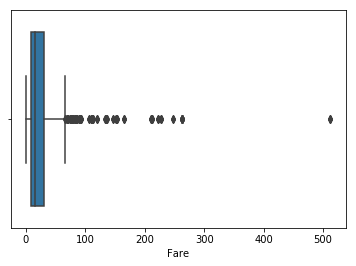

In [28]:
sns.boxplot(x = full_data['Fare']);

In [29]:
#Defining the upper limit as 99% of all data for winsoring its above
upper_limit = full_data['Fare'].quantile(0.99)
print('Outlier treatment starts...')
print('Repress the Fare variable at maximum to %99 value:','%.2f'% upper_limit )

Outlier treatment starts...
Repress the Fare variable at maximum to %99 value: 262.38


In [30]:
for d in [train,test,full_data]:
    d.loc[d['Fare'] > upper_limit,'Fare'] = upper_limit

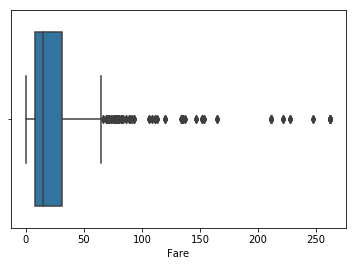

In [31]:
sns.boxplot(x = full_data['Fare']);

## 3.5 Missing Value Treatment <a id = '3.5'></a><br>

In [32]:
print('Missing value treatment starts...')

Missing value treatment starts...


### 3.5.1 For Age <a id = '3.5.1'></a><br>

In [33]:
train["Age"].fillna(full_data.groupby("Title")["Age"].transform("median"), inplace=True)
test["Age"].fillna(full_data.groupby("Title")["Age"].transform("median"), inplace=True)
print('Set the median age of each title for the missing Age values')

Set the median age of each title for the missing Age values


### 3.5.2 For Fare <a id = '3.5.2'></a><br>

In [34]:
test[test["Fare"].isnull()]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Nicknamed,Title,Cabin_dummy
152,1044,3,male,60.5,0,0,NaN,0,Mr,0


In [35]:
test["Fare"].fillna(full_data.groupby("Pclass")["Fare"].transform("median"), inplace=True)
print('Set the median Fare of each passenger class for the missing Fare values.')

Set the median Fare of each passenger class for the missing Fare values.


In [36]:
test["Fare"].isnull().sum()

0

## 3.6 Categorical Variables' Encoding <a id = '3.6'></a><br>

### 3.6.1 Label encoding of sex variable to a dummy variable (0-1) <a id = '3.6.1'></a><br>

In [37]:
for d in [train,test]:
    d["Sex"]=d["Sex"].map(lambda x: 0 if x=='female' else 1)

### 3.6.2 One hot encoding of Title and Pclass <a id = '3.6.2'></a><br>

In [38]:
train, test= [ pd.get_dummies(data, columns = ['Title','Pclass']) for data in [train, test]]

In [39]:
train.head()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Nicknamed,Cabin_dummy,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Noble,Pclass_1,Pclass_2,Pclass_3
0,1,0,1,22.0,1,0,7.2500,0,0,0,0,1,0,0,0,0,1
1,2,1,0,38.0,1,0,71.2833,0,1,0,0,0,1,0,1,0,0
2,3,1,0,26.0,0,0,7.9250,0,0,0,1,0,0,0,0,0,1
3,4,1,0,35.0,1,0,53.1000,0,1,0,0,0,1,0,1,0,0
4,5,0,1,35.0,0,0,8.0500,0,0,0,0,1,0,0,0,0,1


In [40]:
test.head()

,PassengerId,Sex,Age,SibSp,Parch,Fare,Nicknamed,Cabin_dummy,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Noble,Pclass_1,Pclass_2,Pclass_3
0,892,1,34.5,0,0,7.8292,0,0,0,0,1,0,0,0,0,1
1,893,0,47.0,1,0,7.0000,0,0,0,0,0,1,0,0,0,1
2,894,1,62.0,0,0,9.6875,0,0,0,0,1,0,0,0,1,0
3,895,1,27.0,0,0,8.6625,0,0,0,0,1,0,0,0,0,1
4,896,0,22.0,1,1,12.2875,0,0,0,0,0,1,0,0,0,1


# 4. Visualizations <a id = '3'></a><br> 

In this section we are going to illustrate the relationship between variables by using visualization tools.


## 4.1 Correlation matrix <a id = '4.1'></a><br>

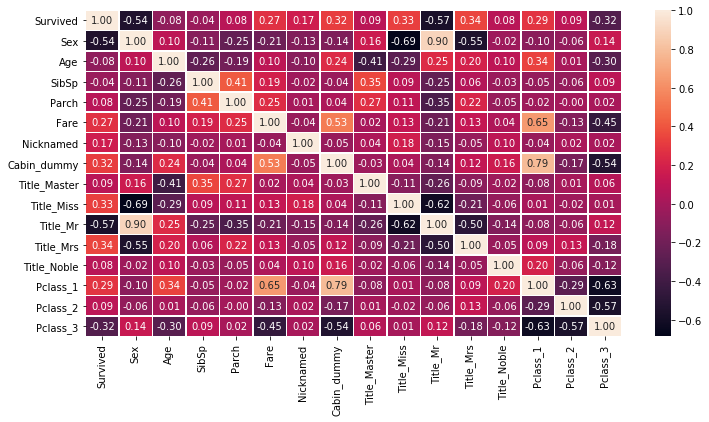

In [41]:
# Let's visualize the correlations between numerical features of the train set.
fig, ax = plt.subplots(figsize=(12,6)) 
sns.heatmap(train.iloc[:,1:len(train)].corr(), annot = True, fmt = ".2f", linewidths=0.5, ax=ax) 
plt.show()

We can see from the heatmaps that "Survived" variable has the highest positive correlations with "Mrs" and "Miss" titles,"Cabin_dummy","PClass" and "Fare" variables. The passengers with nicknames have 17% positive correlation survival which descriptively supports our hypothesis of them for being a useful predictor. Highest negative correlation occurs with 'Mr' title.
**We can say,**
* The passengers are more likely to survive if they paid more, if their cabin information is known, and/or they are in first class.
* Being woman has a very dominant effect on survival.
* As there is 90% correlation between Sex and 'Mr', it is better to drop Sex variable which is already represented by titles.
* The correlation is positive for Age and Parch, however it is negative for SibSp. On the other hand, it is only -0.04 for  SibSp and 0.08 for the former ones. It could be better to visualize these variables in detail.

## 4.2 SibSp and Survived <a id = '4.2'></a><br>       

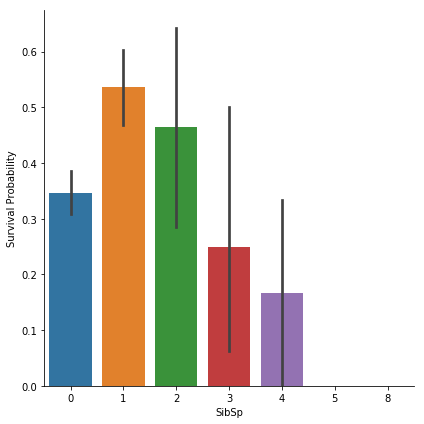

In [42]:
g= sns.factorplot(x = "SibSp", y = "Survived", data = train, kind = "bar", size = 6)
g.set_ylabels("Survival Probability")
plt.show()

Having one sibling or spouse has the highest correlation with survival, incrasing the number more than 2 survival probability decreases dractically.  

## 4.3 Parch and Survived <a id = '4.3'></a><br>       

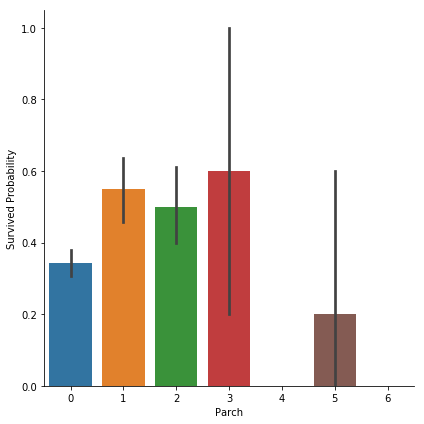

In [43]:
g= sns.factorplot(x = "Parch", y = "Survived", data = train, kind = "bar", size = 6)
g.set_ylabels("Survived Probability")
plt.show()

In [44]:
train.groupby("Survived")['Parch'].value_counts()

Survived  Parch
0         0        445
          1         53
          2         40
          4          4
          5          4
          3          2
          6          1
1         0        233
          1         65
          2         40
          3          3
          5          1
Name: Parch, dtype: int64

This variable seems not to have a clear
  

## 4.4 Age versus Survived <a id = '4.4'></a><br>   

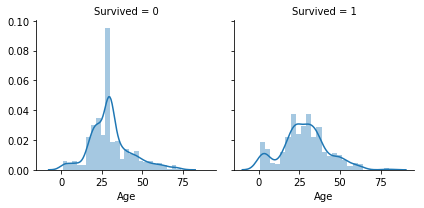

In [45]:
g= sns.FacetGrid(train, col = "Survived")
g.map(sns.distplot, "Age", bins = 25)
plt.show()

The graph on the left hand side shows the distribution of the died passengers while the graph on the right hand side demonstrates the distribution of the survived passengers. 
* For very old and very young passengers, there are high survival rates with respect to death rates which shows they had been saved priviligously. 
* Most of the passengers in the Titanic were between the ages of 15-35.
* Most of the **died passengers** in the Titanic were between the ages of **15-35.**
* Most of the **survived passengers** in the Titanic were between the ages of **20-35.**

# 5. More Feature Engineering and Final Correlation Matrix <a id = '5'></a><br>  

## 5.1 Family size <a id = '5.1'></a><br>

Variables "SibSp" and "Parch" give the information about passengers' family, hence we can add them up to reach the family size of the passenger including the passenger himself/herself.

In [46]:
# FamilySize: Siblings+Spouse+Parent+Children+1(passenger)
for d in [train,test]:
    d["Familysize"] = d["SibSp"] + d["Parch"] + 1

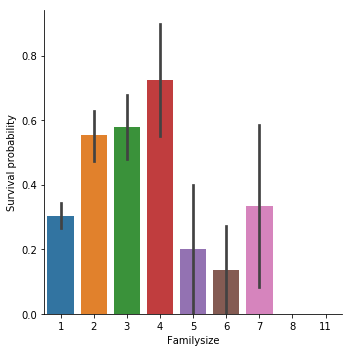

In [47]:
# The relationship between survival rate and FamilySize is. 
g = sns.factorplot(x = "Familysize", y = "Survived", data = train, kind = "bar");
g.set_ylabels("Survival probability");

## 5.2 Generating small_family, dropping family size and sex <a id = '5.2'></a><br>

It is very clear that, the survival is higher if the family size between 1 and 5. Hence, I can crate a new feature of small_family which is 1 if family size between 1 and 5 and 0 else (for single and big families As I mentioned in the previous section, sex variabile has a very high correlation with 'Mr' title and likewise Familysize with its source variables SibSp and Parch. So we drop Familysize and Sex variables.

In [48]:
for d in [train,test]:
    d["small_family"] = [1 if 1<i < 5 else 0 for i in d["Familysize"] ]
    d.drop(["Familysize"], axis = 1, inplace=True)
    d.drop(["Sex"], axis = 1, inplace=True)

In [49]:
train.groupby("small_family")['Survived'].value_counts()

small_family  Survived
0             0           426
              1           173
1             1           169
              0           123
Name: Survived, dtype: int64

Amount of survived small families are considerbaly higher with respect to large families and singles. Amount of deaths are more than two times higher in large families and singles with respect to small families.

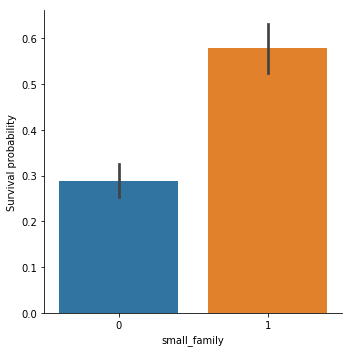

In [50]:
#  The relationship between survival rate and Familysize is. 
g = sns.factorplot(x = "small_family", y = "Survived", data = train, kind = "bar");
g.set_ylabels("Survival probability");

Survival probability of small families is almost more than two times higher than big families.

## 5.3 Final correlation matrix as heatmap <a id = '5.3'></a><br>

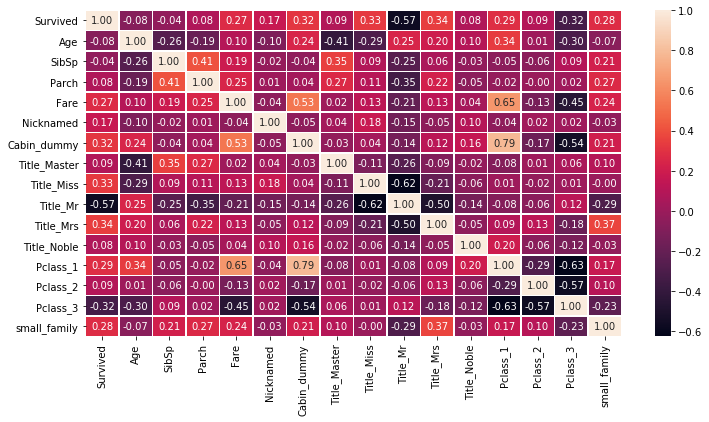

In [51]:
fig, ax = plt.subplots(figsize=(12,6)) 
sns.heatmap(train.iloc[:,1:len(train)].corr(), annot = True, fmt = ".2f", linewidths=0.5, ax=ax) 
plt.show()

<a id = '6'></a><br> 
# 6. Modeling, Evaluation and Model Tuning  

## 6.1 Splitting the train data <a id = '6.1'></a><br>

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
predictors = train.drop(['Survived', 'PassengerId'], axis=1)
target = train["Survived"]
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.20, random_state = 0)

In [53]:
x_train.shape

(712, 15)

In [54]:
x_val.shape

(179, 15)

## 6.2 Validation Set Accuracy for the default models <a id = '6.2'></a><br>

In [55]:
r=1309
models = [LogisticRegression(random_state=r),GaussianNB(), KNeighborsClassifier(),
          SVC(random_state=r,probability=True),DecisionTreeClassifier(random_state=r),
          RandomForestClassifier(random_state=r), GradientBoostingClassifier(random_state=r),
          XGBClassifier(random_state=r), MLPClassifier(random_state=r),
          CatBoostClassifier(random_state=r,verbose = False)]
names = ["LogisticRegression","GaussianNB","KNN","SVC",
             "DecisionTree","Random_Forest","GBM","XGBoost","Art.Neural_Network","CatBoost"]

In [56]:

print('Default model validation accuracies for the train data:', end = "\n\n")
for name, model in zip(names, models):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_val) 
    print(name,':',"%.3f" % accuracy_score(y_pred, y_val))

Default model validation accuracies for the train data:

LogisticRegression : 0.816
GaussianNB : 0.821
KNN : 0.726
SVC : 0.726
DecisionTree : 0.765
Random_Forest : 0.799
GBM : 0.804
XGBoost : 0.838
Art.Neural_Network : 0.810
CatBoost : 0.804


## 6.3 Cross validation accuracy and std of the default models for all the train data <a id = '6.3'></a><br>

In [57]:
results = []
print('10 fold Cross validation accuracy and std of the default models for the train data:', end = "\n\n")
for name, model in zip(names, models):
    kfold = KFold(n_splits=10, random_state=1001)
    cv_results = cross_val_score(model, predictors, target, cv = kfold, scoring = "accuracy")
    results.append(cv_results)
    print("{}: {} ({})".format(name, "%.3f" % cv_results.mean() ,"%.3f" %  cv_results.std()))

10 fold Cross validation accuracy and std of the default models for the train data:

LogisticRegression: 0.827 (0.029)
GaussianNB: 0.799 (0.044)
KNN: 0.727 (0.040)
SVC: 0.676 (0.040)
DecisionTree: 0.798 (0.043)
Random_Forest: 0.816 (0.034)
GBM: 0.836 (0.036)
XGBoost: 0.811 (0.037)
Art.Neural_Network: 0.806 (0.040)
CatBoost: 0.838 (0.032)


## 6.4 Model tuning using crossvalidation <a id = '6.4'></a><br>

In [58]:
# Possible hyper parameters
names = ["LogisticRegression","GaussianNB","KNN","SVC",
             "DecisionTree","Random_Forest","GBM","XGBoost","Art.Neural_Network","CatBoost"]
logreg_params= {"C":np.logspace(-1, 1, 10),
                    "penalty": ["l1","l2"], "solver":['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], "max_iter":[1000]}

NB_params = {'var_smoothing': np.logspace(0,-9, num=100)}
knn_params= {"n_neighbors": np.linspace(1,19,10, dtype = int).tolist(),
                 "weights": ["uniform","distance"],
                 "metric":["euclidean","manhattan"]}
svc_params= {"kernel" : ["rbf"],
                 "gamma": [0.001, 0.01, 0.1, 1, 5, 10 ,50 ,100],
                 "C": [1,10,50,100,200,300,1000]}
dtree_params = {"min_samples_split" : range(10,500,20),
                "max_depth": range(1,20,2)}
rf_params = {"max_features": ["log2","Auto","None"],
                "min_samples_split":[2,3,5],
                "min_samples_leaf":[1,3,5],
                "bootstrap":[True,False],
                "n_estimators":[50,100,150],
                "criterion":["gini","entropy"]}
gbm_params = {"learning_rate" : [0.001, 0.01, 0.1, 0.05],
             "n_estimators": [100,500,100],
             "max_depth": [3,5,10],
             "min_samples_split": [2,5,10]}
gbm_params = {"learning_rate" : [0.001, 0.01, 0.1, 0.05],
             "n_estimators": [100,500,100],
             "max_depth": [3,5,10],
             "min_samples_split": [2,5,10]}

xgb_params ={
        'n_estimators': [50, 100, 200],
        'subsample': [ 0.6, 0.8, 1.0],
        'max_depth': [1,2,3,4],
        'learning_rate': [0.1,0.2, 0.3, 0.4, 0.5],
        "min_samples_split": [1,2,4,6]}

mlpc_params = {"alpha": [0.1, 0.01, 0.02, 0.005, 0.0001,0.00001],
              "hidden_layer_sizes": [(10,10,10),
                                     (100,100,100),
                                     (100,100),
                                     (3,5), 
                                     (5, 3)],
              "solver" : ["lbfgs","adam","sgd"],
              "activation": ["relu","logistic"]}
catb_params =  {'depth':[2, 3, 4],
              'loss_function': ['Logloss', 'CrossEntropy'],
              'l2_leaf_reg':np.arange(2,31)}
classifier_params = [logreg_params,NB_params,knn_params,svc_params,dtree_params,rf_params,
                     gbm_params, xgb_params,mlpc_params,catb_params]               
                  

In [59]:
# Tuning by Cross Validation  
cv_result = {}
best_estimators = {}
for name, model,classifier_param in zip(names, models,classifier_params):
    with timer(">Model tuning"):
        clf = GridSearchCV(model, param_grid=classifier_param, cv =10, scoring = "accuracy", n_jobs = -1,verbose = False)
        clf.fit(x_train,y_train)
        cv_result[name]=clf.best_score_
        best_estimators[name]=clf.best_estimator_
        print(name,'cross validation accuracy : %.3f'%cv_result[name])

LogisticRegression cross validation accuracy : 0.834
>Model tuning done in 31s
GaussianNB cross validation accuracy : 0.808
>Model tuning done in 3s
KNN cross validation accuracy : 0.750
>Model tuning done in 2s
SVC cross validation accuracy : 0.819
>Model tuning done in 44s
DecisionTree cross validation accuracy : 0.840
>Model tuning done in 6s
Random_Forest cross validation accuracy : 0.839
>Model tuning done in 172s
GBM cross validation accuracy : 0.841
>Model tuning done in 290s
XGBoost cross validation accuracy : 0.851
>Model tuning done in 201s
Art.Neural_Network cross validation accuracy : 0.839
>Model tuning done in 494s
CatBoost cross validation accuracy : 0.843
>Model tuning done in 809s


In [60]:
accuracies={}
print('Validation accuracies of the tuned models for the train data:', end = "\n\n")
for name, model_tuned in zip(best_estimators.keys(),best_estimators.values()):
    y_pred =  model_tuned.fit(x_train,y_train).predict(x_val)
    accuracy=accuracy_score(y_pred, y_val)
    print(name,':', "%.3f" %accuracy)
    accuracies[name]=accuracy

Validation accuracies of the tuned models for the train data:

LogisticRegression : 0.816
GaussianNB : 0.816
KNN : 0.760
SVC : 0.782
DecisionTree : 0.816
Random_Forest : 0.827
GBM : 0.810
XGBoost : 0.827
Art.Neural_Network : 0.804
CatBoost : 0.799


####  Extracting first n (e.g. 6) models

In [61]:
n=6
accu=sorted(accuracies, reverse=True, key= lambda k:accuracies[k])[:n]
firstn=[[k,v] for k,v in best_estimators.items() if k in accu]

In [62]:
# Ensembling First n Score

votingC = VotingClassifier(estimators = firstn, voting = "soft", n_jobs = -1)
votingC = votingC.fit(x_train, y_train)
print(accuracy_score(votingC.predict(x_val),y_val))

0.8044692737430168


# 7. Submission  <a id = '7'></a><br>

In [63]:
ids = test['PassengerId']
x_test=test.drop('PassengerId', axis=1)
predictions = votingC.predict(x_test)

#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
output.to_csv('submission_first{}.csv'.format(n), index=False)